In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_rows', 1000000)
pd.set_option('display.max_columns', 1000000)

In [8]:
df_demographics = pd.read_csv('dunnhumby-the-complete-journey/hh_demographic.csv')

def house_structure(composition):
    if 'Single' in composition:
        return 1, 0
    elif 'No' in composition:
        return 2, 0
    elif 'No' not in composition and composition != 'Unknown':
        return 2, 1
    else:
        return None, None

df_demographics['Adults'], df_demographics['Child Boolean'] = zip(*df_demographics['HH_COMP_DESC'].apply(house_structure))
                
df_demographics['KID_CATEGORY_DESC'] = df_demographics['KID_CATEGORY_DESC'].apply(lambda x: 3 if x == '3+' else x)
df_demographics['KID_CATEGORY_DESC'] = df_demographics['KID_CATEGORY_DESC'].apply(lambda x: 0 if x == 'None/Unknown' else int(x))

df_demographics['HOUSEHOLD_SIZE_DESC'] = df_demographics['HOUSEHOLD_SIZE_DESC'].apply(lambda x: 5 if x == '5+' else int(x))

df_demographics['HH_COMP_DESC'] = df_demographics['HH_COMP_DESC'].apply(lambda x: None if x == 'Unknown' else x)

df_demographics['HOMEOWNER_DESC'] = df_demographics['HOMEOWNER_DESC'].apply(lambda x: None if x == 'Unknown' else x)
df_demographics.drop('HH_COMP_DESC',axis=1,inplace=True)

print(df_demographics.shape)
df_demographics.head()


(801, 9)


,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Adults,Child Boolean
0,65+,A,35-49K,Homeowner,2,0,1,2,0
1,45-54,A,50-74K,Homeowner,2,0,7,2,0
2,25-34,U,25-34K,None,3,1,8,2,1
3,25-34,U,75-99K,Homeowner,4,2,13,2,1
4,45-54,B,50-74K,Homeowner,1,0,16,1,0


In [5]:
family_stats.columns

Index(['Unnamed: 0', 'household_key', 'weekly_avg_spending_groceries',
       'weekly_avg_spending_fuel', 'average_visits_per_week', 'Monday %',
       'Tuesday %', 'Wednesday %', ' Thursday %', 'Friday %', 'Saturday %',
       'Sunday %', 'morning %', 'afternoon %', 'evening %'],
      dtype='object')

In [7]:
# statistics about families' shopping habits

family_stats = pd.read_csv('shopping habits of families.csv')
family_stats.drop('Unnamed: 0',axis=1,inplace=True)
print(family_stats.shape)
family_stats.head()

(2500, 14)


,household_key,weekly_avg_spending_groceries,weekly_avg_spending_fuel,average_visits_per_week,Monday %,Tuesday %,Wednesday %,Thursday %,Friday %,Saturday %,Sunday %,morning %,afternoon %,evening %
0,1,63.678824,NaN,1.264706,0.073538,0.187609,0.264042,0.132021,0.220035,0.044007,0.078749,0.285466,0.627678,0.086856
1,2,55.838286,NaN,1.285714,0.063025,0.029412,0.138655,0.245098,0.120448,0.141457,0.261905,0.078431,0.333333,0.588235
2,3,73.144444,20.01,1.277778,0.129207,0.216069,0.106406,0.192182,0.071661,0.279045,0.005429,0.013029,0.694897,0.292074
3,4,46.158077,NaN,1.153846,0.176080,0.136213,0.000000,0.192691,0.023256,0.106312,0.365449,0.116279,0.514950,0.368771
4,5,28.854074,NaN,1.481481,0.171171,0.040541,0.009009,0.135135,0.063063,0.175676,0.405405,0.000000,0.333333,0.666667


In [9]:
total_family_info = family_stats.merge(df_demographics, on='household_key', how='left')
print(total_family_info.shape)
total_family_info.head()

(2500, 22)


,household_key,weekly_avg_spending_groceries,weekly_avg_spending_fuel,average_visits_per_week,Monday %,Tuesday %,Wednesday %,Thursday %,Friday %,Saturday %,Sunday %,morning %,afternoon %,evening %,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,Adults,Child Boolean
0,1,63.678824,NaN,1.264706,0.073538,0.187609,0.264042,0.132021,0.220035,0.044007,0.078749,0.285466,0.627678,0.086856,65+,A,35-49K,Homeowner,2.0,0.0,2,0
1,2,55.838286,NaN,1.285714,0.063025,0.029412,0.138655,0.245098,0.120448,0.141457,0.261905,0.078431,0.333333,0.588235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,73.144444,20.01,1.277778,0.129207,0.216069,0.106406,0.192182,0.071661,0.279045,0.005429,0.013029,0.694897,0.292074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,46.158077,NaN,1.153846,0.176080,0.136213,0.000000,0.192691,0.023256,0.106312,0.365449,0.116279,0.514950,0.368771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,28.854074,NaN,1.481481,0.171171,0.040541,0.009009,0.135135,0.063063,0.175676,0.405405,0.000000,0.333333,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_transactions = pd.read_csv('dunnhumby-the-complete-journey/transaction_data.csv')
print('number of all transactions: ' +str(df_transactions.shape[0]))
df_transactions.head()

number of all transactions: 2595732


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [11]:
df_product = pd.read_csv('dunnhumby-the-complete-journey/product.csv')


In [12]:
big_big_transaction_table = df_transactions.merge(df_product, on='PRODUCT_ID', how='inner')
big_big_transaction_table.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,1929,27021022215,4,1004906,1,1.39,441,-0.6,1755,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
2,568,27021090189,4,1004906,1,1.39,446,-0.6,35,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
3,887,27031467254,5,1004906,1,1.39,298,-0.6,1551,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
4,175,27057508267,7,1004906,1,1.99,446,0.0,2303,2,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB


In [16]:
# Summing individual transactions to have total basket value
transactions_aggregated = big_big_transaction_table.groupby(["household_key", "WEEK_NO"])["SALES_VALUE"].sum().reset_index().sort_values(by='SALES_VALUE', ascending=False)

# add demographic data
transactions_aggregated = transactions_aggregated.merge(total_family_info, on='household_key')

transactions_aggregated.sort_values('household_key').head(10)


,household_key,WEEK_NO,SALES_VALUE,weekly_avg_spending_groceries,weekly_avg_spending_fuel,average_visits_per_week,Monday %,Tuesday %,Wednesday %,Thursday %,Friday %,Saturday %,Sunday %,morning %,afternoon %,evening %,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,Adults,Child Boolean
89832,1,70,32.20,63.678824,NaN,1.264706,0.073538,0.187609,0.264042,0.132021,0.220035,0.044007,0.078749,0.285466,0.627678,0.086856,65+,A,35-49K,Homeowner,2.0,0.0,2,0
89814,1,92,68.34,63.678824,NaN,1.264706,0.073538,0.187609,0.264042,0.132021,0.220035,0.044007,0.078749,0.285466,0.627678,0.086856,65+,A,35-49K,Homeowner,2.0,0.0,2,0
89813,1,51,68.80,63.678824,NaN,1.264706,0.073538,0.187609,0.264042,0.132021,0.220035,0.044007,0.078749,0.285466,0.627678,0.086856,65+,A,35-49K,Homeowner,2.0,0.0,2,0
89812,1,67,68.81,63.678824,NaN,1.264706,0.073538,0.187609,0.264042,0.132021,0.220035,0.044007,0.078749,0.285466,0.627678,0.086856,65+,A,35-49K,Homeowner,2.0,0.0,2,0
89811,1,65,69.78,63.678824,NaN,1.264706,0.073538,0.187609,0.264042,0.132021,0.220035,0.044007,0.078749,0.285466,0.627678,0.086856,65+,A,35-49K,Homeowner,2.0,0.0,2,0
89810,1,38,72.82,63.678824,NaN,1.264706,0.073538,0.187609,0.264042,0.132021,0.220035,0.044007,0.078749,0.285466,0.627678,0.086856,65+,A,35-49K,Homeowner,2.0,0.0,2,0
89809,1,22,73.32,63.678824,NaN,1.264706,0.073538,0.187609,0.264042,0.132021,0.220035,0.044007,0.078749,0.285466,0.627678,0.086856,65+,A,35-49K,Homeowner,2.0,0.0,2,0
89808,1,42,73.77,63.678824,NaN,1.264706,0.073538,0.187609,0.264042,0.132021,0.220035,0.044007,0.078749,0.285466,0.627678,0.086856,65+,A,35-49K,Homeowner,2.0,0.0,2,0
89807,1,28,74.52,63.678824,NaN,1.264706,0.073538,0.187609,0.264042,0.132021,0.220035,0.044007,0.078749,0.285466,0.627678,0.086856,65+,A,35-49K,Homeowner,2.0,0.0,2,0
89806,1,45,75.88,63.678824,NaN,1.264706,0.073538,0.187609,0.264042,0.132021,0.220035,0.044007,0.078749,0.285466,0.627678,0.086856,65+,A,35-49K,Homeowner,2.0,0.0,2,0


In [17]:
non_numerical_columns = ['household_key','AGE_DESC','MARITAL_STATUS_CODE','INCOME_DESC','HOMEOWNER_DESC','HH_COMP_DESC','Child Boolean']
categorical_columns = ['AGE_DESC','MARITAL_STATUS_CODE','INCOME_DESC','HOMEOWNER_DESC','HH_COMP_DESC','Child Boolean']

other_columns = list(filter(lambda x: x not in non_numerical_columns, transactions_aggregated.columns.tolist()))
                       
other_columns

['WEEK_NO',
 'SALES_VALUE',
 'weekly_avg_spending_groceries',
 'weekly_avg_spending_fuel',
 'average_visits_per_week',
 'Monday %',
 'Tuesday %',
 'Wednesday %',
 ' Thursday %',
 'Friday %',
 'Saturday %',
 'Sunday %',
 'morning %',
 'afternoon %',
 'evening %',
 'HOUSEHOLD_SIZE_DESC',
 'KID_CATEGORY_DESC',
 'Adults']

In [19]:
# add new columns where we have the amount the household spent on grocery shopping last time they shopped
# and another column which indicates how long it has been since the last time the hoseuhold shopped
transactions_aggregated['previous_amount'] = transactions_aggregated.groupby('household_key')['SALES_VALUE'].shift(1)

transactions_aggregated['last_shopping_week'] = transactions_aggregated.groupby('household_key')['WEEK_NO'].shift(1)
transactions_aggregated['weeks_since_last_shopping'] = transactions_aggregated['WEEK_NO']-transactions_aggregated['last_shopping_week']

# weekly_spending['STORE_ID'] = weekly_spending['STORE_ID'].astype(str)

print(transactions_aggregated.shape)
transactions_aggregated.head()


(123976, 27)


,household_key,WEEK_NO,SALES_VALUE,weekly_avg_spending_groceries,weekly_avg_spending_fuel,average_visits_per_week,Monday %,Tuesday %,Wednesday %,Thursday %,Friday %,Saturday %,Sunday %,morning %,afternoon %,evening %,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,Adults,Child Boolean,previous_amount,last_shopping_week,weeks_since_last_shopping
0,1609,49,1283.33,241.698404,36.7145,2.893617,0.306708,0.086199,0.201079,0.072321,0.079414,0.120586,0.133693,0.407864,0.519969,0.072167,45-54,A,125-149K,Homeowner,5.0,3.0,2,1,NaN,NaN,NaN
1,1609,92,628.56,241.698404,36.7145,2.893617,0.306708,0.086199,0.201079,0.072321,0.079414,0.120586,0.133693,0.407864,0.519969,0.072167,45-54,A,125-149K,Homeowner,5.0,3.0,2,1,1283.33,49.0,43.0
2,1609,65,472.44,241.698404,36.7145,2.893617,0.306708,0.086199,0.201079,0.072321,0.079414,0.120586,0.133693,0.407864,0.519969,0.072167,45-54,A,125-149K,Homeowner,5.0,3.0,2,1,628.56,92.0,-27.0
3,1609,63,455.25,241.698404,36.7145,2.893617,0.306708,0.086199,0.201079,0.072321,0.079414,0.120586,0.133693,0.407864,0.519969,0.072167,45-54,A,125-149K,Homeowner,5.0,3.0,2,1,472.44,65.0,-2.0
4,1609,69,440.52,241.698404,36.7145,2.893617,0.306708,0.086199,0.201079,0.072321,0.079414,0.120586,0.133693,0.407864,0.519969,0.072167,45-54,A,125-149K,Homeowner,5.0,3.0,2,1,455.25,63.0,6.0


In [ ]:
# Add month and season info

In [23]:
transactions_aggregated['weekly_avg_spending_fuel'] = transactions_aggregated['weekly_avg_spending_fuel'].fillna(0)


In [24]:
transactions_aggregated.isna().sum()

household_key                        0
WEEK_NO                              0
SALES_VALUE                          0
weekly_avg_spending_groceries        0
weekly_avg_spending_fuel             0
average_visits_per_week              0
Monday %                             0
Tuesday %                            0
Wednesday %                          0
 Thursday %                          0
Friday %                             0
Saturday %                           0
Sunday %                             0
morning %                            0
afternoon %                          0
evening %                            0
AGE_DESC                         67488
MARITAL_STATUS_CODE              67488
INCOME_DESC                      67488
HOMEOWNER_DESC                   83910
HOUSEHOLD_SIZE_DESC              67488
KID_CATEGORY_DESC                67488
Adults                           72806
Child Boolean                    72806
previous_amount                   2500
last_shopping_week       

In [28]:
transactions_aggregated.columns

Index(['household_key', 'WEEK_NO', 'SALES_VALUE',
       'weekly_avg_spending_groceries', 'weekly_avg_spending_fuel',
       'average_visits_per_week', 'Monday %', 'Tuesday %', 'Wednesday %',
       ' Thursday %', 'Friday %', 'Saturday %', 'Sunday %', 'morning %',
       'afternoon %', 'evening %', 'AGE_DESC', 'MARITAL_STATUS_CODE',
       'INCOME_DESC', 'HOMEOWNER_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC', 'Adults', 'Child Boolean', 'previous_amount',
       'last_shopping_week', 'weeks_since_last_shopping'],
      dtype='object')

In [50]:
training_data = transactions_aggregated.dropna()
print(training_data.shape)

X = training_data[[ 'average_visits_per_week', 'Monday %', 'Tuesday %', 'Wednesday %',
       ' Thursday %', 'Friday %', 'Saturday %', 'Sunday %', 'morning %',
       'afternoon %', 'evening %', 'AGE_DESC', 'MARITAL_STATUS_CODE',
       'INCOME_DESC', 'HOMEOWNER_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC', 'Adults', 'Child Boolean', 'previous_amount',
       'last_shopping_week', 'weeks_since_last_shopping']]

# X = training_data[['STORE_ID',
#        'TRANS_TIME', 'previous_amount', 'days_since_last_shopping']]


y = training_data['SALES_VALUE']

(36426, 27)


In [51]:
X['Adults'] = X['Adults'].astype(int)
X.dtypes

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


average_visits_per_week      float64
Monday %                     float64
Tuesday %                    float64
Wednesday %                  float64
 Thursday %                  float64
Friday %                     float64
Saturday %                   float64
Sunday %                     float64
morning %                    float64
afternoon %                  float64
evening %                    float64
AGE_DESC                      object
MARITAL_STATUS_CODE           object
INCOME_DESC                   object
HOMEOWNER_DESC                object
HOUSEHOLD_SIZE_DESC          float64
KID_CATEGORY_DESC            float64
Adults                         int64
Child Boolean                 object
previous_amount              float64
last_shopping_week           float64
weeks_since_last_shopping    float64
dtype: object

In [52]:
X = pd.get_dummies(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [53]:
X.shape

(36426, 44)

In [68]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [69]:
param = {'max_depth':5, 'eta':0.7, 'booster':'gbtree', 'subsample':0.5,
         'objective':'reg:squarederror','eval_metric':'rmse'}
bst = xgb.train(param, dtrain)



In [70]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

preds = bst.predict(dtest)
mae = mean_absolute_error(y_test, preds)
print('mean absolute error: ' + str(mae))

mse = mean_squared_error(y_test, preds)
rmse = math.sqrt(mse)
print('mean squared error: ' + str(mse))
print('root mean squared error: ' + str(rmse))

r2 = r2_score(y_test, preds) 
print('R2: ' + str(r2))

mean absolute error: 3.2089517661418614
mean squared error: 66.95074567679232
root mean squared error: 8.182343532069057
R2: 0.9867981167961662


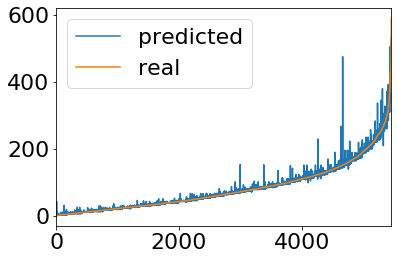

In [71]:
results = pd.DataFrame({'predicted':preds, 'real':y_test}).sort_values(by=['real','predicted'])
results = results.reset_index().drop('index', axis=1)
results.plot()

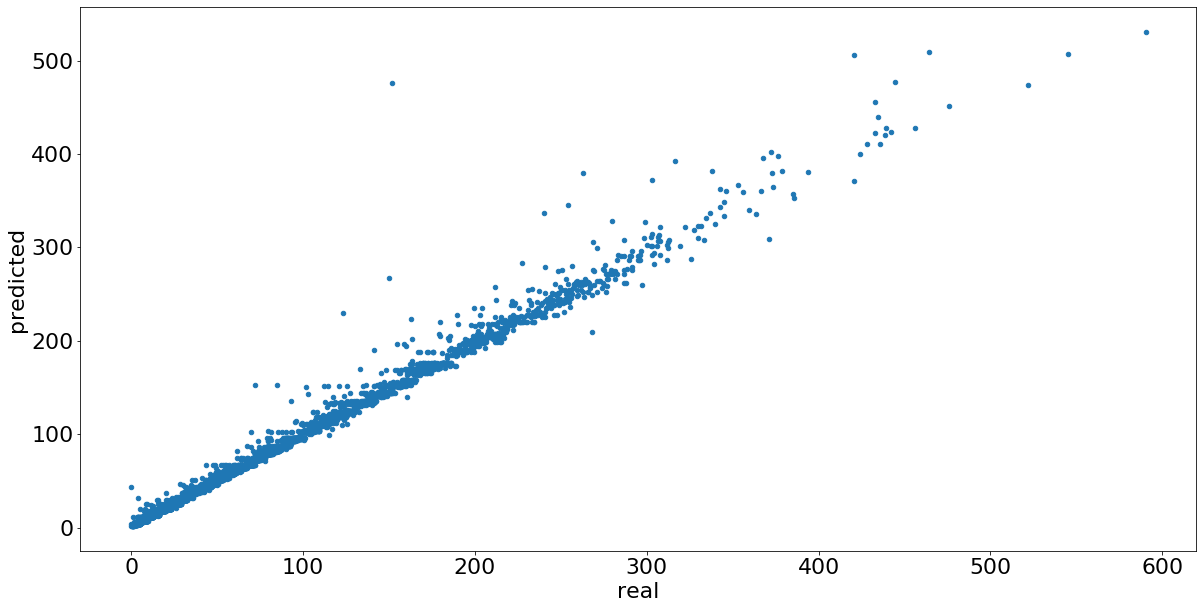

In [72]:
matplotlib.rcParams.update({'font.size': 22})
results.plot(kind='scatter',figsize=(20,10), x='real', y='predicted')